In [1]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import jieba

In [81]:
df = pd.read_csv('../data/corpus/sqlResult_1558435.csv', encoding='gb18030')

In [82]:
df

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...
5,89612,张怡,中国证券报?中证网,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",金融股一枝独秀 配置价值犹存,http://www.cs.com.cn/gppd/201706/t20170623_533...
6,89611,NaN,威锋网@http://www.feng.com/,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""21""...",配骁龙660 全面屏鼻祖夏普新机酝酿中,http://www.cnbeta.com/articles/tech/623603.htm
7,89610,申玉彬 整理,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",博友早评：震荡有利消化套牢筹码,http://www.cs.com.cn/gppd/201706/t20170623_533...
8,89609,李杭_BJS4645,荆楚网-楚天都市报,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""1600""...",武汉千余警察出动 抓获808名俊男靓女全是诈骗犯,http://news.163.com/17/0614/14/CMT9N8G80001899...
9,89608,吴瞬,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",纳入MSCI指数 A股长期配置价值提升,http://www.cs.com.cn/gppd/201706/t20170623_533...


In [87]:
# Make labels
df['source'].apply(lambda x: 1 if x == '新华社' else 0)

0        0
1        0
2        0
3        1
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
89581    1
89582    1
89583    1
89584    1
89585    1
89586    1
89587    1
89588    1
89589    1
89590    1
89591    1
89592    1
89593    1
89594    1
89595    1
89596    1
89597    1
89598    1
89599    1
89600    1
89601    1
89602    1
89603    1
89604    1
89605    1
89606    1
89607    1
89608    1
89609    1
89610    1
Name: source, Length: 89611, dtype: int64

In [4]:
# Exclude na source
df = df[~pd.isna(df['source'])]

In [5]:
indexes = np.random.choice(df.index, 5)

In [6]:
df.loc[indexes]

,id,author,source,content,feature,title,url
25109,64503,彭昭之,新华社,新华社照片，瑞金（江西），2017年4月12日\n36年的守护：“大山就是我的亲人！”\n在...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（图片故事）（8）36年的守护：“大山就是我的亲人！”,http://home.xinhua-news.com/gdsdetailxhsnew/18...
51107,38505,布加勒斯特分社林惠芬,新华社,新华社布加勒斯特５月４日电（记者林惠芬）罗马尼亚国家男足主帅、德国名教练克里斯托夫·道姆...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",（体育·国际足球）罗马尼亚男足主帅：发展教育是足球的未来,http://home.xinhua-news.com/gdsdetailxhsnew/20...
23574,66038,李木子,新华社,新华社照片，联合国，2017年4月10日\n（国际）（3）玛拉拉·尤萨夫扎伊获任联合国和平使...,"{""type"":""政治法律"",""site"":""新华社"",""url"":""http://home...",（国际）（3）玛拉拉·尤萨夫扎伊获任联合国和平使者,http://home.xinhua-news.com/gdsdetailxhsnew/18...
80592,9019,胡虎虎,新华社,新华社照片，温泉（新疆），2017年5月30日\n（体育）（2）自行车——中国新疆第十一届环...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",（体育）（2）自行车——中国新疆第十一届环赛里木湖公路赛开赛,http://home.xinhua-news.com/gdsdetailxhsnew/21...
21532,68080,Carl Recine,新华社,新华社照片，外代，2017年4月9日\n（外代二线）足球——英超联赛：利物浦胜斯托克城\n4...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",[9]（外代二线）足球——英超联赛：利物浦胜斯托克城,http://home.xinhua-news.com/gdsdetailxhsnew/18...


In [7]:
df.loc[~df.index.isin(indexes)].shape, df.shape

((89604, 7), (89609, 7))

## Load word2vec model

In [8]:
model = Word2Vec.load('../data/corpus/news-model.model')

In [9]:
df.iloc[0]['content']

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [10]:
tokens = jieba.lcut(df.iloc[0]['content'])

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/22/cm7yqr716jxb4cvbnq5q48740000gn/T/jieba.cache
Loading model cost 1.514 seconds.
Prefix dict has been built succesfully.


In [11]:
tokens

['此外',
 '，',
 '自',
 '本周',
 '（',
 '6',
 '月',
 '12',
 '日',
 '）',
 '起',
 '，',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '，',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '（',
 '含',
 '开发',
 '版',
 '/',
 '体验版',
 '内测',
 '，',
 '稳定版',
 '暂不受',
 '影响',
 '）',
 '，',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '。',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI',
 ' ',
 '9',
 '的',
 '研发',
 '之中',
 '。',
 '\r\n',
 'MIUI',
 ' ',
 '8',
 '去年',
 '5',
 '月',
 '发布',
 '，',
 '距今已有',
 '一年',
 '有余',
 '，',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '。',
 '\r\n',
 '当然',
 '，',
 '关于',
 'MIUI',
 ' ',
 '9',
 '的',
 '确切',
 '信息',
 '，',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '。',
 '\r\n']

In [12]:
model.train(tokens, total_examples=1, epochs=1)

(147, 177)

In [13]:
df1 = df.iloc[10:20]['content'].astype('U').apply(jieba.lcut)

In [14]:
df1.columns=['tokens']

In [15]:
df1.index

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

In [16]:
dir(df1.values)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e

## Load doc2vec model

In [17]:
import gensim

In [18]:
doc2vec_model = gensim.models.doc2vec.Doc2Vec.load('../project/article_plagiarism/train.doc2vec.model')

In [21]:
doc2vec_model.infer_vector(['我', '爱', '祖国'])

array([ 1.11854069e-01,  6.04732037e-02,  1.04283411e-02, -1.41282842e-01,
        2.00672746e-02,  5.06739654e-02, -1.02202147e-02,  1.18865773e-01,
        6.84859753e-02, -4.38966565e-02,  8.29810128e-02, -7.51076192e-02,
        2.76039485e-02,  1.79398153e-02, -2.18148492e-02, -1.19337268e-01,
        4.84223478e-02,  7.97329918e-02,  1.66553650e-02, -5.91623709e-02,
       -5.62611021e-05, -3.41625959e-02, -2.18578577e-02, -5.87298758e-02,
       -9.76270586e-02, -2.35225633e-03, -1.18280493e-01, -2.71238592e-02,
       -2.24327892e-02,  1.90906841e-02,  1.29725829e-01, -3.33655663e-02,
       -7.02687055e-02,  1.64508931e-02,  2.06853092e-01, -2.76114959e-02,
       -1.78797349e-01,  4.65514436e-02, -1.26726568e-01, -3.94911170e-02,
        1.39847519e-02,  6.57239929e-02, -9.25000161e-02,  4.43923138e-02,
       -2.98734773e-02, -1.29402623e-01, -2.31725872e-02,  1.22123957e-02,
       -2.80168597e-02,  6.26843702e-03, -1.84113812e-02, -1.69189163e-02,
       -4.42362092e-02,  

## Load training set

In [22]:
import pickle

In [41]:
token_trainset = pd.read_pickle('../project/article_plagiarism/test.tokens.pkl')

In [32]:
doc2vec_model.infer_vector(token_trainset.iloc[0])

array([ 0.08615661,  0.00571277,  0.06194115, -0.14597173,  0.05407646,
        0.09420991, -0.08502413,  0.02573417,  0.04907657, -0.05083504,
       -0.0113223 ,  0.13201644,  0.0402508 , -0.03354266,  0.06692152,
        0.03582704,  0.06035351, -0.06239919,  0.1451335 , -0.0259518 ,
       -0.00019938,  0.09110898,  0.02391434,  0.03567914,  0.08093309,
       -0.04971611, -0.13765821,  0.11503883, -0.07770099, -0.11300616,
        0.1218595 , -0.03422092,  0.01087055, -0.10792209,  0.05589977,
       -0.03230501, -0.11581805, -0.03434241, -0.01238403,  0.04088522,
       -0.11554585, -0.00223159,  0.04163302,  0.12468044,  0.05231282,
        0.09476303,  0.02324963,  0.03771982,  0.06095295,  0.01083921,
       -0.01380353, -0.0119059 ,  0.06805717,  0.0034917 , -0.0542572 ,
       -0.15645616, -0.03997285, -0.07100532,  0.05465673,  0.05896325,
       -0.06551187,  0.00857765, -0.02735864,  0.08222295,  0.01062156,
        0.06016934,  0.10652033, -0.00952904, -0.1254357 , -0.07

In [33]:
token_trainset.index

Int64Index([    3,     6,     8,    18,    19,    21,    25,    39,    43,
               52,
            ...
            89560, 89563, 89565, 89567, 89569, 89573, 89593, 89598, 89599,
            89606],
           dtype='int64', length=17922)

In [42]:
trainset = pd.read_pickle('../project/article_plagiarism/test.pkl')

In [44]:
df = pd.DataFrame({'source': trainset['source'], 'tokens': token_trainset})

In [43]:
trainset['source'].shape, token_trainset.shape

((17922,), (17922,))

In [46]:
df.index

Int64Index([    3,     6,     8,    18,    19,    21,    25,    39,    43,
               52,
            ...
            89560, 89563, 89565, 89567, 89569, 89573, 89593, 89598, 89599,
            89606],
           dtype='int64', length=17922)

In [47]:
trainset.index

Int64Index([    3,     6,     8,    18,    19,    21,    25,    39,    43,
               52,
            ...
            89560, 89563, 89565, 89567, 89569, 89573, 89593, 89598, 89599,
            89606],
           dtype='int64', length=17922)

In [49]:
token_trainset.index

Int64Index([    3,     6,     8,    18,    19,    21,    25,    39,    43,
               52,
            ...
            89560, 89563, 89565, 89567, 89569, 89573, 89593, 89598, 89599,
            89606],
           dtype='int64', length=17922)

In [60]:
doc_mat = np.vstack([doc2vec_model.infer_vector(doc) for doc in token_trainset])

In [61]:
doc_mat.shape

(17922, 100)

In [77]:
X = pd.DataFrame(data=doc_mat, index=token_trainset.index)

In [78]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3,0.144275,0.001231,0.053709,-0.023145,0.078952,0.047917,-0.079282,-0.022066,0.036724,-0.034870,...,0.020174,-0.052386,-0.003533,-0.054878,0.016841,-0.004610,-0.027946,0.044117,-0.075545,0.087555
6,-0.137507,0.099836,0.071871,0.354370,-0.162304,0.084071,0.336820,0.221262,-0.991676,-0.115737,...,0.062102,-0.482463,-0.000442,0.385664,0.041247,0.140787,0.553035,0.494058,0.165571,-0.285074
8,1.205811,-1.491974,-1.608430,-0.591831,-1.277039,0.419865,1.593256,0.849385,0.913545,0.099824,...,-0.914903,0.222495,-1.251414,1.044982,-0.596644,0.797271,-0.109079,3.178175,1.236877,-0.695481
18,0.266536,0.165914,-0.306359,0.013677,0.256076,-0.232379,0.165085,0.030571,0.281832,-0.229632,...,-0.235010,-0.505190,0.098333,0.139080,0.095144,0.277872,-0.039434,0.206270,-0.000684,-0.005018
19,-0.834128,-0.823494,-0.873935,1.764307,1.061579,0.225079,-0.792050,1.637965,-0.477098,-0.371314,...,0.462886,-0.367035,-1.053573,-0.999194,-1.316238,0.035311,2.066910,0.366528,-0.870468,0.756716
21,-0.428066,0.369523,-2.563719,3.866775,0.989367,0.753945,-0.102909,-1.085450,0.147499,0.046229,...,-0.156344,-1.312937,-0.106011,-0.337326,1.182299,0.877456,0.742499,1.974844,-0.707712,-0.605362
25,0.267707,-0.106935,0.166699,0.037595,-0.132160,0.217312,-0.192255,-0.228874,-0.141200,-0.002116,...,-0.011195,-0.152139,0.121903,0.220984,-0.089831,-0.035197,-0.018307,0.036916,-0.078940,-0.096552
39,0.038381,0.044279,0.056009,-0.091714,-0.000489,0.015278,-0.089600,0.022162,0.050614,0.003348,...,0.043060,-0.066157,0.074755,-0.092845,0.077415,0.031255,-0.023371,0.106499,-0.076039,0.121129
43,-0.010406,-0.277625,0.602565,0.154707,0.888770,-0.046584,0.099459,0.031784,-0.411881,-0.071434,...,0.058671,0.369404,-0.929041,-0.916148,0.177227,0.242099,0.314759,-0.446068,-0.317162,-0.193556
52,-1.293172,0.373243,-1.318504,0.589356,-0.294379,1.401338,1.975001,1.584295,0.049155,0.557645,...,-0.894161,-0.656510,-0.655883,-1.000518,-0.437707,0.917172,0.662583,1.439596,0.137117,2.555708


## Example for logistic regression

In [73]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [67]:
X, y = load_iris(return_X_y=True)

In [70]:
X.shape, y.shape

((150, 4), (150,))

In [69]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [75]:
clf.predict(X[:2, :])

array([0, 0])

In [76]:
clf.predict_proba(X[:2, :]) 

array([[9.81796729e-01, 1.82032562e-02, 1.44268498e-08],
       [9.71724746e-01, 2.82752243e-02, 3.01656728e-08]])

## Apply Logistic regression

In [88]:
train_labels = pd.read_pickle('../project/article_plagiarism/train.label.pkl')

In [89]:
train_labels

17087    1
29398    1
69733    1
49827    1
14167    1
82403    1
82575    1
73789    1
17732    1
35871    1
24643    1
22319    1
68004    1
57022    1
14203    1
9384     0
16817    1
70010    1
15334    1
55516    1
26691    1
35255    1
20997    1
50855    1
6655     0
82191    1
34031    1
3363     0
2452     0
54763    1
        ..
14003    1
4517     0
40042    1
4413     0
28526    1
28628    1
24520    1
69913    1
1238     0
88557    1
37495    1
66075    1
44740    1
52012    1
26564    1
4019     1
61146    1
33651    1
10089    0
26086    1
40646    1
2259     0
3717     0
36469    1
17905    1
88064    1
16715    1
84283    1
46644    1
60524    1
Name: source, Length: 71687, dtype: int64

In [90]:
test_labels = pd.read_pickle('../project/article_plagiarism/test.label.pkl')

In [91]:
test_labels

3        1
6        0
8        0
18       0
19       0
21       0
25       0
39       1
43       0
52       0
54       0
59       0
70       0
71       0
76       0
78       0
80       0
81       0
82       0
87       0
92       0
95       1
99       0
100      0
104      0
105      0
109      0
112      0
117      0
123      0
        ..
89441    1
89446    1
89458    1
89460    1
89472    1
89473    1
89474    1
89479    1
89480    1
89487    1
89492    1
89504    1
89508    1
89518    1
89528    1
89533    1
89534    1
89538    1
89543    1
89545    1
89560    1
89563    1
89565    1
89567    1
89569    1
89573    1
89593    1
89598    1
89599    1
89606    1
Name: source, Length: 17922, dtype: int64

In [92]:
train_features = pd.read_pickle('../project/article_plagiarism/train.features.pkl')

In [93]:
test_features = pd.read_pickle('../project/article_plagiarism/test.features.pkl')

In [94]:
train_features

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
17087,-0.014621,0.101112,-0.022333,-0.021723,-0.038643,-0.155911,-0.010302,0.219558,0.026696,-0.041411,...,0.226041,0.068715,0.152808,-0.044413,-0.031382,0.047200,-0.094833,0.008406,-0.077024,-0.089835
29398,-0.047307,0.037585,-0.087311,0.014334,-0.001407,-0.249294,0.066975,0.207814,-0.087844,-0.017293,...,0.122202,0.028651,0.133813,0.036938,-0.042332,0.046991,-0.055178,-0.032597,-0.002470,-0.056504
69733,-0.019323,-0.028079,-0.006872,-0.103353,0.117638,-0.232578,-0.034635,0.209709,0.010719,-0.144634,...,0.120193,0.084579,-0.009622,0.155599,0.124628,0.155820,-0.032640,0.267045,-0.077543,-0.047123
49827,0.094278,0.001194,-0.022085,0.051840,-0.026541,-0.088998,-0.057301,0.150013,-0.111859,-0.000606,...,0.095971,0.146846,0.030862,0.010901,0.057704,-0.042539,-0.149742,-0.000133,0.057519,-0.024933
14167,0.011923,0.022176,0.062863,0.047655,-0.032051,-0.104686,0.155157,0.259040,-0.050989,0.167427,...,0.049040,0.221084,0.098541,-0.038319,-0.190391,-0.059453,-0.030957,-0.030667,0.262133,0.205411
82403,0.029858,0.014841,-0.109095,0.046793,-0.026435,-0.114113,-0.042742,0.246072,-0.026439,-0.008336,...,0.135072,0.001475,0.087608,0.012118,-0.022021,0.019688,-0.007507,-0.057853,-0.027114,-0.012461
82575,-0.016317,0.020783,-0.088202,0.013971,-0.057493,-0.083923,0.034387,0.173557,-0.163529,0.104973,...,0.231659,0.152024,0.074873,-0.142110,-0.148979,-0.006461,0.042330,-0.011695,0.063181,-0.115283
73789,0.106923,-0.070688,-0.144943,-0.060158,-0.177334,-0.264023,-0.239365,0.288523,0.188577,0.105653,...,-0.372654,-0.011634,0.210120,0.405240,0.082218,0.210677,0.022621,-0.083223,-0.496132,0.071459
17732,0.926251,-0.479533,0.260396,-0.344621,0.374428,0.083166,-0.375576,-0.466551,0.029014,0.801164,...,-0.048914,-0.089204,0.480641,-0.094207,-0.430087,0.379711,-0.574606,-0.457577,0.219015,-0.261507
35871,0.126779,0.059333,-0.214161,0.035619,0.088690,-0.247137,-0.070055,0.191745,-0.040292,-0.058296,...,0.209703,-0.004899,0.200502,0.085937,-0.121193,0.104208,-0.087888,-0.089056,-0.086049,-0.096868


In [95]:
test_features

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3,-0.161872,-0.009100,0.044858,0.014669,0.047547,0.048277,-0.132203,0.063622,-0.013926,0.012698,...,-0.066526,0.066170,-0.108659,0.082060,-0.056452,-0.061920,0.089878,0.004708,-0.038219,-0.101778
6,-0.116897,-0.172094,-0.665411,-0.234045,-0.646312,-0.217340,-0.211693,0.019485,-0.458883,0.603975,...,-0.244428,-0.203080,0.400780,-0.734068,0.018443,-0.142608,-0.153986,-0.069798,0.779344,0.331009
8,1.188475,-0.819562,0.232700,-3.031180,0.057024,0.745198,-1.283319,-0.701044,0.023652,1.391822,...,-0.067786,0.253040,-1.999688,0.194917,-0.655984,1.801901,-0.065305,0.022639,-0.806389,0.524130
18,0.458658,0.043007,-0.076944,-0.016600,0.077649,-0.140051,0.143172,0.090261,-0.051729,-0.022653,...,-0.094100,0.147550,0.185742,-0.097562,0.054558,0.298738,-0.047316,0.118884,0.099048,0.155048
19,1.433878,-1.362989,0.431427,1.548894,-0.914617,-0.107542,0.808146,0.128424,0.062962,0.772665,...,-0.244998,1.487368,0.702136,-0.711408,-1.255233,0.345821,0.764403,-0.514089,0.538843,-2.160355
21,2.488886,-1.878454,-0.223160,-0.288290,-0.016066,-0.831221,1.071759,1.049318,0.532486,1.187525,...,-1.116681,-0.628095,0.765025,-0.041267,-0.702816,1.661712,-0.823825,-1.599581,-0.657264,-1.077297
25,-0.106030,0.135595,-0.108754,0.076577,0.000969,0.141608,-0.151153,0.070615,-0.174782,-0.003767,...,0.169989,-0.152690,-0.172081,-0.214618,-0.186710,-0.118053,0.251723,-0.043225,0.032808,-0.227960
39,-0.124291,-0.049112,-0.011099,-0.018215,0.008464,0.007315,-0.130870,0.098632,0.032003,-0.032988,...,-0.026960,0.040696,-0.103782,0.026275,-0.061215,-0.087234,0.053405,-0.068232,-0.063615,-0.085592
43,-0.209369,-0.808682,-0.171439,-0.063193,-0.064448,0.900763,-0.499406,0.371616,-0.575946,-0.692924,...,0.873709,0.005039,0.567888,-0.998674,0.075768,-0.788618,0.238586,0.016307,0.244780,-0.178798
52,0.667967,-1.271902,-1.998901,-1.463594,-0.219858,-0.420921,1.583417,1.987300,0.112201,1.193823,...,-1.906087,0.066756,0.777997,-0.683975,-0.222607,1.537753,-0.511188,-1.383149,0.957672,-0.258902


## Apply SVM

In [97]:
from sklearn import svm

In [98]:
clf = svm.SVC(gamma='scale')

In [99]:
clf.fit(train_features, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
test_predict = clf.predict(test_features)

In [108]:
np.where(test_predict == test_labels)[0].shape[0] / test_labels.shape[0]

0.9353866755942417

## Plot the dataset

In [110]:
import matplotlib.pyplot as plt

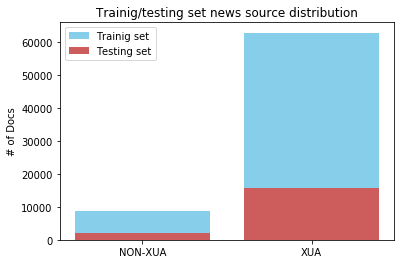

In [134]:
fig, ax = plt.subplots()
ax.bar(train_labels.value_counts().index, train_labels.value_counts().values, color='SkyBlue', label='Trainig set')
ax.bar(test_labels.value_counts().index, test_labels.value_counts().values, color='IndianRed', label='Testing set')

ax.set_ylabel('# of Docs')
ax.set_title('Trainig/testing set news source distribution')
ax.set_xticks([1, 0])
ax.set_xticklabels(('XUA', 'NON-XUA'))
ax.legend()

In [143]:
train_labels.value_counts()

1    62956
0     8731
Name: source, dtype: int64

## Test model with different news from website

In [145]:
# http://www.xinhuanet.com/fortune/2019-01/27/c_1124048088.htm
doc = '''此前召开的中央经济工作会议将推动制造业高质量发展作为2019年重点工作任务。会议提出，要推动先进制造业和现代服务业深度融合，坚定不移建设制造强国。

　　我国将从哪几个方面着重发力，推动制造业高质量发展？工信部相关负责人对此进行解析。

　　加强先进制造创新引领

　　当前，我国制造业大而不强的问题依然突出。制造业供给体系质量不高，难以有效适应消费升级和产业升级需求的变化。推动制造业高质量发展，首先要在培育发展新动能上下功夫。

　　先进制造是制造业中创新最活跃、成果最丰富的领域，也是价值链上高利润、高附加值的领域，是制造业高质量发展最为重要的抓手之一。

　　“先进制造短期看是实现经济良性循环的关键，长期看是国家经济命脉。”工信部副部长罗文说，要引导先进制造重大生产力布局，让创新成果加速落实到产业中。

　　当前，我国智能制造工程全面实施，工业强基工程稳步实施，制造业数字化转型步伐加快。先进制造创新从跟跑为主，进入跟跑在加快、并跑在增多、领跑在涌现的新阶段。

　　工信部部长苗圩说，2019年，工信部将把创新摆在产业发展的核心位置，加强关键核心技术攻关，打破从基础研究、应用研究到产业化的“死亡之谷”，培育发展一批先进制造业集群。

　　值得关注的是，2019年，工信部将继续实施国家制造业创新中心建设工程，并对制造业创新中心工程强化考核评估，实施动态管理，推动重点领域创新发展。

　　加快传统产业数字化转型

　　制造业高质量发展，重点和难点在传统产业。将制造优势与网络化、智能化相叠加，形成数字时代新供给能力，对重塑制造业竞争优势具有重大意义。

　　近年来，通过淘汰落后产能，加快产业优化升级等多方面举措，制造业提质增效步伐正在加快。

　　以智能化改造为例，工信部已遴选出305个智能制造试点示范项目，在此基础上初步建成208个具有较高水平的数字化车间或智能工厂。这些项目智能化改造前后对比，生产效率平均提升37.6%，运营成本平均降低21.2%。

　　2019年，工信部将开展钢铁产能置换方案专项抽查，持续推进落后产能依法依规退出，实施新一轮重大技术改造升级工程、绿色制造工程，促进区域协调发展。在“破”与“立”上同时发力，加快产业提质增效。

　　在数字化“赋能”方面，苗圩提出，将继续开展网络提速降费，加快固定宽带千兆应用推广，做好中小企业精准降费等，夯实数字基础。

　　此外，工信部将支持可穿戴设备、消费级无人机、智能服务机器人等产品创新，持续升级和扩大信息消费，推广个性定制、柔性供应等生产方式，用“市场之手”推动产业加速智能化进程，释放数字经济潜能。

　　降低制造业企业成本

　　推动实现制造业高质量发展，尤须营造与之相适应的产业生态。其中，降低制造业企业成本，促进公平竞争尤其重要。

　　苗圩说，2019年，工信部将推动进一步降低增值税税率和企业所得税，大力清理规范涉企收费，持续推进清理拖欠民营企业账款的专项行动。

　　与此同时，工信部着力将各项扶持小型微型企业发展的政策措施落到实处。一方面，深化“放管服”改革，创新行业管理方式，改进公共服务。特别是在缓解中小企业融资难融资贵方面，推动完善应收账款、知识产权等质押融资机制和产融合作试点，实施小微企业融资担保业务降费奖补政策，推动建立政、银、企风险分担机制。

　　另一方面，开展中小企业质量提升帮扶，推进国家中小企业政策信息互联网发布平台建设，实施促进大中小企业融通发展三年行动计划，培育“专精特新”“小巨人”企业。'''

In [147]:
doc_tokens = jieba.lcut(doc)

In [148]:
import pickle

In [153]:
f = open('../project/article_plagiarism/model.logistic_regression.pkl', 'rb')
lr_model = pickle.load(f)

In [155]:
doc_vec = doc2vec_model.infer_vector(doc_tokens)

In [164]:
doc_mat = pd.DataFrame(data=doc_vec).T

In [206]:
lr_model.predict(doc_mat) # Predict -> 'XinhuaNet'

array([1])

### News from 163.com

In [175]:
# https://news.163.com/19/0127/09/E6H2EQKI00018AOR.html
doc2='''中新网1月27日电 据外媒报道，美国总统特朗普25日暂停联邦政府局部停摆35天的窘境。国际评级机构标准普尔估计，在政府“关门”的这段时间，美国经济至少损失60亿美元。


此次是美国史上联邦政府停摆最久的一次。标普全球评级25日表示，这次美国政府“关门”的代价“很可能比我们先前预期更高”。

标普全球评级在声明中说，根据他们分析，“美国经济至少损失60亿美元……高于白宫要求的边境墙经费57亿美元。”

特朗普25日宣布，他与国会两党达成一致，暂时结束从去年12月22日持续至今的政府停摆。美国联邦政府将获得3周的临时拨款，直至2月15日。

尽管特朗普让步，在还没先拿到“建墙”经费的情况下就同意让政府恢复运作，但特朗普仍威胁，如果“建墙”计划未来3周没有重大突破，可能再度出现敌对状况，造成政府再度“关门”，或者他将宣布国家进入紧急状态。'''

In [176]:
doc2_tokens = jieba.lcut(doc2)

In [177]:
doc2_vec = doc2vec_model.infer_vector(doc2_tokens)

In [178]:
doc2_mat = pd.DataFrame(data=doc2_vec).T

In [204]:
lr_model.predict(doc2_mat) # Predict -> 'XinhuaNet'

array([0])

In [185]:
def predict(doc, doc2vec_model):
    doc_tokens = jieba.lcut(doc)
    doc_vec = doc2vec_model.infer_vector(doc_tokens)
    doc_mat = pd.DataFrame(data=doc_vec).T
    return lr_model.predict(doc_mat)

In [186]:
doc3='''据中国之声《新闻纵横》报道：近日，陕西省渭南韩城市龙门镇上峪口村的多位村民向央广新闻热线反映称，村庄附近有一家焦化企业，常年不定时排放黄烟、黑烟，并伴有刺鼻的臭味，闻着恶心头晕，有害气体常会笼罩整个村庄和镇上的街道。村民还反映称，当地焦化企业涉嫌和有关部门打游击，白天一切正常，而到了晚上，无组织排放现象比较明显。

上峪口村所在的韩城市位于陕西省东部黄河西岸，是关中地区主要的焦化产业集聚区，焦化产能占到整个关中地区的近80%，是汾渭平原蓝天保卫战的重点区域。一年前，焦化污染初次被举报时，韩城环保部门并没有引起重视；去年12月，中央环保督察组发现，韩城市焦化企业存在敷衍治理等一系列突出问题，群众投诉举报不断，反映十分强烈。

但记者近日实地调查发现，尽管2018年以来反映当地焦化企业环境污染的网络舆情不断，中央环保督察也刚点名批评不久，当地仍有焦化企业存在无组织排放的现象。是污染治理技术存在难题还是敷衍治理的局面仍未改变？

村民每天在院子里扫粉尘：“每天早晨都能扫一桶”

1月22日清晨，上峪口村村民李于刚（化名）推开房门，一夜之间，院子里又是一层厚厚的灰渣子，头一天，他刚把院子打扫干净，“我的院子每天早晨，用这么粗这么高的大桶，粉尘都能扫一桶。特别是刮风的时候，我们新村的粉尘就没治了！一个是焦油味，一个是煤气味，很严重！”

中央环保督察点名批评后：陕西韩城仍有焦化企业无组织排放（来源：）
上峪口村新村一户人家清晨的院子里蒙上了一层厚厚的灰渣子（视频由村民提供）

李于刚住在上峪口村的新村，新村位于G108路边，距离焦化企业约100米左右。新村约有70户，四五百口人。在他看来，当地政府及有关部门明知当地大气污染的状况，但没有采取强有力的措施。李于刚告诉记者：“应该清楚，但是没有动作，没有作为，那有啥法子？不定时的黄烟，哎呀，那个毒气可大了。”

背靠梁山的上峪口村背靠梁山的上峪口村

“一到晚上就有刺鼻气味”附近焦化企业或涉嫌偷排

上峪口村的村干部说，离村子最近的大气污染源就是海燕焦化集团，由于风向的原因，一到天气风力稳定的时候，就会出现刺鼻的味道：“天一热的话，风向就朝上，也脏也臭，特别是下边靠近厂子的村庄。白天基本上好一些，一到晚上就明显的很，就是一种刺鼻的臭味。”

气味白天正常，而晚上却异常，在村民看来，附近的焦化企业涉嫌偷排。村里的干部告诉记者，位于村庄地势下方的海燕焦化集团，不定时会冒出黑烟或者黄烟，每次出现这种情况，企业的解释就是环保设施正常运行，是突发停电导致的，但让村民疑惑的是，突发情况为何频频发生？“保守地说，最起码一个月就有一次，就是排的黄烟、黑烟而且是火，好像焦炉就打开了，火就着起来了。”

多位村干部说，以前类似现象每周都可能会出现一次，几乎是常态化的，中央环保力度加强以来，这种现象出现的频次已有明显减少，但还是经常可以看到这种现象。

记者实地探访：企业内设备明火、黄烟明显空气中有刺鼻恶臭

中国之声记者在现场看到，1月20日中午12点至下午3点，海燕焦化厂区内的设备出现明火，持续三个小时，每间隔10到20分钟，会排一次颜色发黄发黑的烟，和周边企业排出的白烟形成鲜明对比。14点20分，突然明火扩大，烟囱里排出浓厚的黄烟，先后两次排放，共持续三分钟左右，而后黄烟消散，明火持续燃烧。



1月20日14点32分，中国之声记者在现场拨打环保热线12369对此进行反馈。14点45分左右，海燕焦化厂区内明火熄灭，其他烟囱烟量减小。14点55分，在108国道旁的上峪口新村附近有一股恶臭，像食物发霉一样的味道，由于天气不好，风比较大，持续几分钟后恶臭消失。

韩城市环保局：“反映的现象确实存在，都是无组织的，无法实时监测”

韩城市环保局有关科室负责人表示，中央环保督察已经通报了韩城焦化企业存在的问题，当地村民反映的问题确实存在：“你看到的现象和群众反映的现象，都是无组织的，有时候是突发的，随机的，但是从主要通道排放的，都是达标的。这个都是有国家自动监测的。”

韩城市环保局有关科室负责人还表示，中央环保督查对此问题交办后，虽然相关问题一定程度上得到整改，但还有不少短板。环保部门也想了很多办法，但两个工业园区内的几家焦化企业，在加煤和出炉的过程中，一些污染现象仍然难以避免和彻底解决。

“群众闻的这个味道和整个园区的空气质量是息息相关的，因为韩城的工业园区从70年代开始的，时间长了，常年累月下来，以前存在的问题，虽然得到整改，但难免还有短处。”

这位负责人还称，2018年当地焦化企业共发生过6次重大无组织排放的突发情况，其中有几次是因为强风暴雨企业电路出现问题等。目前，环保部门还无法做到对焦化企业无组织排放的实时监测。预计2019年后半年，韩城市才能做到无组织排放的实时监测，监测平台还正在做。

专业人士：排放性质非常恶劣若治理到位完全不会出现

去年12月，中央环保督察组通报韩城焦化企业污染典型案例，陕西省环境保护执法局连夜成立工作组，迅即赴韩城市介入调查并督促整改。并表示对涉嫌环境污染犯罪的行为，坚决移交司法处理。但一个月后，环境问题依旧存在，而且当地环保局并未对记者拍摄到的现象，给予更多调查和反馈，只是表示类似无组织排放现象，在韩城彻底杜绝还存在技术难题。事实果然如此吗？

站在上峪口村附近的梁山上俯瞰整个龙门工业园区内的焦化企业站在上峪口村附近的梁山上俯瞰整个龙门工业园区内的焦化企业

记者就1月20日拍摄到的多段视频，向某省负责大气污染治理的负责人咨询。这位常年主管大气环境工作的负责人表示，焦化企业无组织排放的问题，完全可以得到有效监管。他认为，如果焦化企业治理到位的话，完全不会出现视频中的这种情况：“它这个问题非常严重，性质非常恶劣。超标排放不足以形容它，它这是属于无组织、无序排放。刚才我看这个视频，它一阵阵浓烟冒起的时候，应该是出焦的时候，冒黑烟的时候，应该是装煤的时候。”

这位负责人还表示，焦化厂是可以治理到非常好的水平，关键是上不上设施、是否正常使用设施：“还有一个问题就是，他们焦炉的碳化室高度是否符合国家政策，也有可能是他们这个焦炉很快就要淘汰。所以在淘汰前进行疯狂生产，认为也不值得治理了。”

这位负责人说，陕西的一些临近省份已要求2019年4米3以下的高炉通通淘汰。从目前情况来看，焦化厂虽然有一部分执行的不太好，但大部分都不会甚至绝对不会出现视频中拍摄到的这种情况。陕西省环境科学研究院大气所所长陈洁也告诉中国之声记者：“企业一定会碰到（停电）等异常状态的，如果管理的好，这种机率就比较小，管理不好的企业有可能就比较大，我觉得不该是常态的，该上的措施都要上，但运行的怎么样，不能完全保证。”

中央环保督察曾“点名批评”韩城市焦化企业敷衍治理问题

前不久，中央环保督察“回头看”通报称，韩城市委、市政府在推动焦化等重点行业清洁生产改造和深度治理方面抓得不实，虽然出台了专项治理方案，但标准不严，要求不高，措施不硬，治理工作流于表面；韩城市工信、环保等部门督促整改不力，监管不到位；企业污染防治主体责任不落实，环保工作被动应付，表面治理，环境污染问题长期没有得到有效解决。

据韩城日报报道，2018年12月10日，韩城市市长杜鹏带队检查焦化企业环保整改工作，对中央生态环境保护督察组反馈问题进行调研督办。杜鹏指出，韩城市焦化企业存在的环保问题，既有企业管理不规范的原因，也有监管部门工作不细致的原因。针对中央环保督察组检查发现的问题，找准问题症结，制定整改方案，落实整改时限，补齐环保短板。

记者注意到，中央环保督察对韩城焦化企业敷衍治理的通报，问题具体，措辞严厉。点名批评才过去一个多月，为何仍有焦化企业出现无组织排放现象？当地群众反映强烈的大气污染问题，何时才能彻底改变？中国之声将持续关注。'''

In [198]:
predict(doc3, doc2vec_model)  # correct

array([0])

In [188]:
doc4='''（原标题：老公欠债百万，她哭着要跳楼！杭州民警急了：我家欠了300多万）

1月24日上午9时20分许，余杭110接到吴先生报警说他的妻子坐在楼顶阳台外要跳楼，家人劝不住，寻求警方帮助。

余杭公安PTU403、405号巡车接到警情后迅速赶至位于五常街道某住宅区的现场。

老公欠债百万她哭着要跳楼 警察急了:我家欠300万

女子得知丈夫生意不顺欠债百万

欲轻生

民警王众带领队员们赶到阳台时，一名黄衣女子声嘶力竭地哭喊着。她的父亲及妹妹正在一旁劝说，丈夫见到民警来了，当即跪下请求帮助。

PTU队员们赶紧上前将其扶起。

原来，吴先生从事建筑工程，近几年来生意不顺，原本还算殷实的家庭负债100多万。

起初吴先生一直瞒着妻子楚女士，可没想到年关近了要债的人纷纷上门，催债的电话也打到了楚女士的手机上。瞒不下去了，吴先生才向老婆坦白。

一下子听到自家欠债100多万，楚女士接受不了。

结婚这么多年，老公没给家里拿过多少钱，房子也是租的，现在还欠了这么多，拖累了父母，顿时想到了轻生。

楚女士爬到了11楼阳台的隔栏外，不让家人靠近。

“大姐，你看，我比你小，你可以叫我小王，我们有什么事情进来说好不好？”民警王众了解了事情经过后，开始劝说楚女士。

可楚女士一个劲地哭喊着，并没有理会王众。

老公欠债百万她哭着要跳楼 警察急了:我家欠300万

劝说民警自曝家中欠债三百万

成功吸引女子注意力

最终脱离危险

“大姐，我跟你说，其实你们才欠了100多万，我家欠了300多万！这世上没有什么坎过不去的是不，和别人比比，你们还是幸运的啊。活着才是最重要的嘛！”王众继续说。

楚大姐听到这话，终于听进去了，她开始向民警王众诉说生活辛酸。

此时，PTU巡车组长陈星星已经绕到梦女士的身后，慢慢翻过了隔栏。趁着楚女士还在说话，陈星星上前一把将楚女士抱住。众人合力将楚女士拉回了阳台。

老公欠债百万她哭着要跳楼 警察急了:我家欠300万

回到房间后，民警王众在屋内继续劝说了许久。楚女士也表示，当时是自己冲动了，生活还是要继续，只有努力才有希望。

延伸 · 推荐
新晋云南首富遭立案调查 "翡翠第一股"欠债数十亿

屋漏偏逢连夜雨。近来，东方金钰（600086.SH）“翡翠第一股”的位置坐的可谓风雨飘摇，在债务逾期的泥潭中还没有抽身，又涉嫌信披违规被调查。



1月18日，东方金钰发布公告称，证监会已于1月16日下发《调查通知书》，因公司涉嫌信息披露违法违规一事对其进行立案调查。



1月22日，东方金钰发布终止重大资产重组事项公告。



受上述消息影响，截至1月23日，东方金钰报3.93元/股，总市值53.06亿元。仅仅是进入2019年20多天的时间里，东方金钰的股价已经跌去14.75%。'''

In [202]:
predict(doc4, doc2vec_model)   # not correct

array([1])

In [207]:
doc5='''“20日早上他发微信说已经在回家的路上了，等到了再给我打电话。但这都第6天了，还没回来，手机也关机。”昨日，家在兴平的何先生焦急地说，不知道儿子小何现在情况咋样。在警方和媒体介入寻找后，昨晚好消息传来，小何已经被在西安居住的爷爷接走了，并和父母通了电话。

宿舍里发现儿子绝笔，称在网上借了1万元

何先生是兴平市人，他26岁的儿子何某在西安市未央区后围寨村附近的一家机器厂工作。昨日，何先生说，1月20日清晨6时许，小何发微信说，他已到西安城西客运站，当天中午就能回家，等下车了再给他打电话。“上午9点多，我们给他电话，但他手机关机了，我们在家等了一天，他都没回来。”

1月21日晚，何先生和妻子来到儿子在西安居住的员工宿舍。“他所有东西都在宿舍，衣服也在床上堆着，没有收拾，只把手机、身份证和银行卡带走了。”何先生说，他在儿子的桌子上还发现了一张留言。

昨日上午，华商报记者看到留言上写着：“爸妈对不起，这辈子我看我是不行了，欠您二老的下辈子还。咱们家现在所有的矛盾基本原因都在我。本来想把借的钱赚回来之后再走，但这半年下来感觉我控制不住自己，别人问起来就说我出车祸了。除了这10000元再没有别的了，像我这样的人再这么下去就把家拖垮了，算了就这样，何X绝笔。”

何某留言上还写着，微粒贷借了10000元，以及何某的银行卡密码。

“儿子说现在已经想开了，真的特别感谢”

记者在何先生和儿子的微信聊天记录中看到，21日、22日，何先生多次给儿子发消息，但显示和对方不是好友，信息无法发送。1月22日上午，何先生在西安市公安局沣东新城分局阿房宫派出所报了警。


何先生告诉华商报记者：“我们23日查到他的银行卡余额只剩200元，没有钱，我不敢想他会做什么，现在就担心娃的安全。”何先生说，他和妻子在西安一直待到1月25日，他们跑遍了附近的网吧，但都没有找到儿子。“他不光把我们微信拉黑了，还把其他人都拉黑了，我问了他朋友、工友，都说联系不上他。”

昨日下午，记者拨打了何某的电话，已关机。随后，记者从公安沣东新城分局阿房宫派出所了解到，因何某留有遗书，办案民警都很重视，正在调查中。

昨晚，记者从公安沣东新城分局阿房宫派出所了解到，民警调查发现，25日何某在三桥某宾馆有开房记录，26日下午民警赶到后发现何某还未退房，但没有见到何某。昨晚9时许，何先生告诉华商报记者，他和妻子正准备坐车前往西安。随后，何先生的妻子董女士联系记者说，儿子已经被在西安居住的爷爷接走了，并通了电话。“儿子说是因为最近压力太大了，现在已经想开了，真的特别感谢你们和警察的帮忙找到我儿子，他现在人没事我就放心了。”'''

In [210]:
predict(doc5, doc2vec_model)  # correct

array([0])

In [215]:
# http://www.xinhuanet.com/politics/2019-01/26/c_1124046189.htm
doc6 = '''新华社北京1月26日电　题：奋斗不停步 改革再出发——“四个自信”筑牢强国之基

　　新华社记者

　　超薄玻璃能有多薄？0.12毫米。我国做到了，站在了世界先进水平前列。

　　中国自信的背后，是40年改革开放的伟大实践。从贫穷落后到迈向全面小康，从国民经济濒临崩溃到成为世界第二大经济体，从多项技术被“卡脖子”到部分领跑全球……改革开放创造了举世瞩目的中国奇迹。

　　奋斗不停步，改革再出发。立足新时代，面对复杂多变的国内外形势，中国人民在党的领导下志不改、道不变，在全面深化改革中不断创新体制机制，夯实“四个自信”的根基，向着中华民族伟大复兴的中国梦进发。

　　自信之源：改革开放的伟大飞跃

　　新年伊始，万象更新。在珠三角腹地的广东佛山小镇北滘，碧桂园机器人谷项目首期正在紧锣密鼓地建设，成为“北滘智造”又一张闪亮名片。可谁能想到，60年前，这里曾经是成片的稻田，人们常年挣扎在温饱线上。

（在习近平新时代中国特色社会主义思想指引下·将改革开放进行到底·强国之基）（新华全媒头条·图文互动）（1）奋斗不停步 改革再出发——“四个自信”筑牢强国之基

  1月14日，在位于广东佛山北滘镇的广东工业设计城，设计师在进行工业设计。新华社记者 马宁 摄

　　经历了上世纪发展乡镇企业、推行“三包”生产责任制、企业股份制改造等一系列改革，北滘从穷乡僻壤蜕变为中国唯一拥有两家世界500强企业的经济强镇，2018年地区生产总值超过600亿元，实现了7.5%的强劲增长。

　　“2017年底我到有一万多人口的莘村慰问贫困户，找来找去，就只找到了两家。”看似有些“没如愿”，但北滘镇镇长王崇曦打心眼儿里感到高兴。这一年，北滘农村居民人均可支配收入达到18843元，远超13432元的全国平均水平。

　　“北滘人日子越过越红火，对未来的生活充满希望！”王崇曦说，以人民为中心推动改革创新、以目标和问题导向发展经济，北滘走出了一条人民共享改革成果之路，越走信心越足。

　　“北滘奇迹”是“中国奇迹”的缩影。作为世界上最大的发展中国家，中国在短短几十年里成功摆脱贫困并跃升为世界第二大经济体，创造了人类社会发展史上的奇迹。

　　拥有世界最大规模的义务教育体系、基本医疗保障网和棚户区改造工程，建成世界最大的高速公路网、最快的超级计算机……40年改革开放引领中国人民富起来、强起来，中国特色社会主义制度的优越性充分释放和彰显。

　　在江苏省昆山市陆家镇一个不起眼的角落，国际标准化组织儿童乘用车项目委员会秘书处，就设在这里的好孩子集团。

（在习近平新时代中国特色社会主义思想指引下·将改革开放进行到底·强国之基）（新华全媒头条·图文互动）（2）奋斗不停步 改革再出发——“四个自信”筑牢强国之基

  1月24日，工人在江苏昆山好孩子婴儿车总装厂装配线上工作。新华社发（薛宏宇 摄）

　　曾几何时，儿童用品行业还没有国际标准。当江苏企业好孩子集团向国际标准化组织申请主导建立儿童用品的国际标准体系时，业内领先的西方发达国家发出诘难：发展中国家怎么可以牵头制定标准？！哪儿来的底气？

　　2018年，国际标准化组织儿童乘用车项目委员会专家齐聚上海，讨论并起草儿童推车标准。在实地参观好孩子集团的研发中心、智能化制造车间和实验室后，法国人竖起了大拇指，美国、德国、日本等发达国家的专家也被“好孩子”的实力折服，纷纷表示出合作意愿。

　　“底气就来自于在改革开放大潮中坚持自主创新和持续研发带来的技术积累。”好孩子集团高级副总裁竺云龙说，改革开放不仅带来了机遇和市场，更激发了市场主体的创新活力和奋斗精神。

　　“改革开放40年来，‘四个自信’贯穿创新发展始终。”中建材蚌埠玻璃工业设计研究院院长、首席科学家彭寿说，“中国走出了符合自己国情的道路，只要努力，就能干成任何人不能干成的事情。”

（在习近平新时代中国特色社会主义思想指引下·将改革开放进行到底·强国之基）（新华全媒头条·图文互动）（3）奋斗不停步 改革再出发——“四个自信”筑牢强国之基

  1月9日，在中建材蚌埠玻璃工业设计研究院的生产车间内，工作人员在巡检超薄玻璃生产线。新华社记者 汤阳 摄

　　自信之基：全面深化改革的创新探索

　　40年前，为了解决温饱，18位安徽小岗村农民以“托孤”的“壮烈”方式，先行先试土地承包责任制；40年后，怀着对美好生活的向往，安徽定远县肖岗村农民开始尝试农村土地承包经营权有偿退出。

　　随着改革步入深水区，一成不变、固步自封必然难以为继；唯有一切从实际出发，与时俱进不断创新和调整，发展的信心才更坚定。

　　党的十八大以来，我国蹄疾步稳推进全面深化改革，推出1500多项改革举措。深化供给侧结构性改革，深化党和国家机构改革，正风肃纪、反腐惩恶……一系列改革措施大刀阔斧、刀刃向内，彰显推进复兴伟业的坚强决心和坚定信心。

　　在明确清晰的战略规划和顶层设计保障下，全面深化改革更是充分激发了蕴藏在人民群众中的创造伟力。破解突出矛盾、破除发展障碍、创造美好生活……全国各地形成了不断向纵深推进的全面深化改革态势。

　　改革创新，让各种生产要素的活力竞相迸发。

　　科技成果转化是世界性难题。政府有政策，但不是技术实施者；企业有技术需求，但找不到供应方；科研院所有技术，但对市场需求不掌握。

　　江苏产业技术研究院聚焦企业愿意“买单”的技术需求，采取项目经理制等创新举措，形成了系统科学有效的科技成果转化制度体系，极大地调动了各方面积极性。目前，研究院年均转化科技成果1000项，年均衍生、孵化科技型企业100家。

（在习近平新时代中国特色社会主义思想指引下·将改革开放进行到底·强国之基）（新华全媒头条·图文互动）（4）奋斗不停步 改革再出发——“四个自信”筑牢强国之基

　　 1月10日，在位于南京的江苏省产业技术研究院，清华大学教授王燕在“智能集成电路设计技术研究所（筹）国际研讨会”上发言。新华社记者 马宁 摄

　　改革创新，让人民群众收获满满的幸福感。

　　在牵头医院成立医共体管理中心统一履行基层管理职责，实施“上联三甲、下带乡村”的精准帮扶，开展编制周转池试点……一系列医改创新举措让安徽省天长市实现了大病不出县，提前达到了2020年县域内就诊率90%左右的全国目标。不仅如此，医务人员平均年收入较医改前翻了一番，工作积极性提高；群众就医满意度显著提高。

（在习近平新时代中国特色社会主义思想指引下·将改革开放进行到底·强国之基）（新华全媒头条·图文互动）（5）奋斗不停步 改革再出发——“四个自信”筑牢强国之基

  1月8日，游客在安徽省黄山市的呈坎古村落参观游览。新华社记者 马宁 摄

　　改革创新，还让传统文化在新时代大放异彩，满足了人们日益增长的精神文化需求，唤起了人们对中国优秀文化再学习再认识的渴望。

　　安徽省黄山市近年来对古村落进行保护性开发利用，不仅吸引越来越多国内游客踏足观赏自然风景和人文历史风貌，还在外国人中掀起了“中国文化热”。

　　从2016年起，每年夏天，数十名来自美国哈佛大学、耶鲁大学等知名学府的学生都会来到黄山市研学一周，观摩这里的古建筑、制茶及手工艺，了解徽州的历史文化。

　　“中华文化历史悠久，那儿的人们也非常热情好客，和我分享了许多改革开放以来他们生活的变化。”来自耶鲁大学的弗丽达·考尔德伦已经学习了三年中国书法，还研习了中医药知识，被其蕴含的哲学思想深深折服。

　　“改革开放以来，中国的发展绝不是一成不变、刻板僵化的，而是一个不断丰富发展的生命体。”中央党校（国家行政学院）习近平新时代中国特色社会主义思想研究中心副研究员崔丽华说。

　　从全面深化改革的顶层设计到改革创新的基层新实践、新探索，为中国特色社会主义事业的发展带来了强大推动力；而改革创新取得的新经验、新成果，进一步增强了中国人民自信的底气。

　　自信之力：攻坚克难再出发

　　“习近平总书记在庆祝改革开放40周年大会上的讲话，不是就改革开放谈改革开放，而是将其放在历史的线索中来分析。”南京航空航天大学思政理论课教师何畏说，“从中很容易发现，新中国成立以来不同时期的发展理念是一脉相承的，都在回答时代之问、人民之问。”

（在习近平新时代中国特色社会主义思想指引下·将改革开放进行到底·强国之基）（新华全媒头条·图文互动）（6）奋斗不停步 改革再出发——“四个自信”筑牢强国之基

　　1月11日，在南京航空航天大学的大学生思想引领理论研究工作室，思政理论课教师何畏（右）与学生交流。新华社记者 马宁 摄

　　当前，我国改革步入深水区，经济发展进入新常态，外部环境复杂严峻，思想文化领域交流、交融、交锋频繁，各种矛盾、风险、挑战叠加，更需要坚定“四个自信”，持续夯实“四个自信”的物质基础。

　　“我们既要看到矛盾、困难、问题、挑战和危机的一面，更要看到希望、机遇、光明和前景的一面。”国家统计局局长宁吉喆21日在国新办发布会上说。

　　走过千山万水，仍需跋山涉水。

　　“改革必须坚持正确方向，既不走封闭僵化的老路、也不走改旗易帜的邪路。”习近平总书记论改革的这段话，既是对过去经验的总结，也是对未来方向的昭示。

　　改革开放再出发，就要牢牢扭住经济建设这个中心——

　　2018年11月，广东出台《关于促进民营经济高质量发展的若干政策措施》，提出10条59项针对性措施，着力降低民营企业生产经营成本，解决融资难、融资贵问题；2019年初，又发布《关于进一步促进科技创新的若干政策措施》，在激励企业创新动力等12个方面推出系列政策，率先提出“科技型中小企业研发费用加计扣除100%比例奖补”等措施，全面激发创新活力。

　　“无论是‘民营经济十条’还是‘科创十二条’，都是能够立即兑现的措施，对民营企业的支持力度非常大。我们的信心更足了！”广州明珞汽车装备有限公司副总裁龙璞说。

　　改革开放再出发，就要不断满足人民对美好生活的新期待——

　　以“科技尽善，生活尽美”为愿景，美的集团把改善用户服务体验作为发展方向，向工业自动化与机器人领域进军，对产品线进行智能化改造，2018年10月发布了全新工业互联网平台M.IoT。

（在习近平新时代中国特色社会主义思想指引下·将改革开放进行到底·强国之基）（新华全媒头条·图文互动）（7）奋斗不停步 改革再出发——“四个自信”筑牢强国之基

  1月14日，在广东佛山北滘镇的美的集团总部展厅，工作人员在介绍冰箱产品。新华社记者 马宁 摄

　　“消费者不仅可以个性化定制产品，还将享受到万物互联带来的便利。”美的集团股份有限公司副总裁张小懿说。

　　改革开放再出发，就要以国家战略为引领，放眼全局、走向世界——

　　服务国家长三角一体化战略，2018年12月，中新嘉善现代产业园项目签约。16.5平方公里的园区，将结合嘉善本地特色产业，重点发展智能制造、5G的大规模商用，并将以智能传感为抓手，向产业链上下游延伸，打造智能传感产业的集聚高地。

　　“中新集团正在积极探索向‘一带一路’沿线国家和城市推介园区开发经验。”中新苏州工业园区开发集团股份有限公司董事长、总裁赵志松介绍，位于东盟国家的一个园区项目2019年上半年即将落地。'''

In [216]:
predict(doc6.replace('新华社', '网易新闻'), doc2vec_model)  # correct

array([1])